In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [115]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
df.shape

(5572, 2)

In [131]:
df = pd.get_dummies(df, columns=['Category'], drop_first=True, prefix='is')

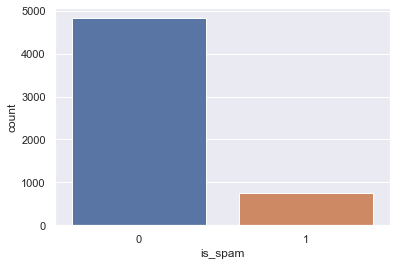

In [132]:
# Imbalance dataset
sns.set(style='darkgrid')
sns.countplot(data=df, x='is_spam');

In [133]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [134]:
# df['clean_message'] = df['Message'].str.replace(r'[^A-Za-z]', ' ', regex=True)
# df['clean_message'] = df['clean_message'].str.lower()

In [135]:
def text_preprocessor(text):
    
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    word_list = word_tokenize(text)
    word_list = [token for token in word_list if token.isalpha() and token not in stopwords.words('english')]
    word_list = [lemmatizer.lemmatize(word) for word in word_list]
    final_text = ' '.join(word_list)
    return final_text

In [136]:
df['clean_message'] = df['Message'].apply(text_preprocessor)

In [137]:
df['char_count'] = df['clean_message'].str.len()
df['word_count'] = df['clean_message'].str.split().str.len()
df['average_word_count'] = df['char_count'] / df['word_count']

In [138]:
df.head()

,Message,clean_message,char_count,word_count,average_word_count,is_spam
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82,16,5.125000,0
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23,6,3.833333,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...,98,20,4.900000,1
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35,9,3.888889,0
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,35,7,5.000000,0


# Bag of Words

In [139]:
vectorizer = CountVectorizer()
bow_message = vectorizer.fit_transform(df['clean_message'])

In [140]:
df_new_bof = pd.DataFrame(bow_message.toarray(),
                      columns=vectorizer.get_feature_names_out()).add_prefix('count_')

In [141]:
df_new_bof.head()

,count_aa,count_aah,count_aaniye,count_aaooooright,count_aathi,count_ab,count_abbey,count_abdomen,count_abeg,count_abel,...,count_zebra,count_zed,count_zero,count_zhong,count_zindgi,count_zoe,count_zogtorius,count_zoom,count_zouk,count_zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# spacy

# TfIdf

In [143]:
df_new_tfidf = pd.DataFrame(tfidf_message.toarray(),
                      columns=tfidfvectorizer.get_feature_names_out()).add_prefix('count_')

In [144]:
df_new_tfidf.head()

,count_aa,count_aah,count_aaniye,count_aaooooright,count_aathi,count_ab,count_abbey,count_abdomen,count_abeg,count_abel,...,count_zebra,count_zed,count_zero,count_zhong,count_zindgi,count_zoe,count_zogtorius,count_zoom,count_zouk,count_zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build Model

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
X = df['clean_message'].values
y = df['is_spam'].values

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [175]:
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [176]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)

# Validation

<AxesSubplot:>

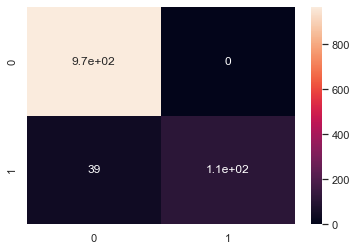

In [177]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



# ROC Curve

In [179]:
from sklearn.metrics import roc_curve

In [182]:
nb.predict_proba(X_test_tfidf)

array([[9.95656110e-01, 4.34388968e-03],
       [9.99522107e-01, 4.77893414e-04],
       [9.98364474e-01, 1.63552578e-03],
       ...,
       [8.52857312e-01, 1.47142688e-01],
       [9.63727061e-01, 3.62729387e-02],
       [9.53133309e-01, 4.68666910e-02]])

In [184]:
y_pred_proba = nb.predict_proba(X_test_tfidf)[:,1]

In [186]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

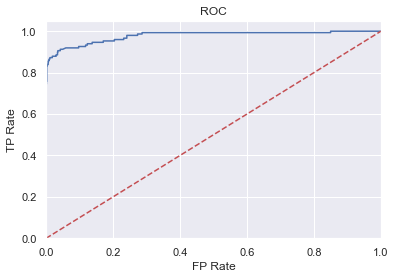

In [187]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()